rsi

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


                 Close        High         Low        Open     Volume
Date                                                                 
2024-05-24  179.240005  180.080002  173.729996  174.839996   65479700
2024-05-28  176.750000  178.250000  173.160004  176.399994   59736600
2024-05-29  176.190002  178.149994  173.929993  174.190002   54782600
2024-05-30  178.789993  182.669998  175.380005  178.580002   77784800
2024-05-31  178.080002  180.320007  173.820007  178.500000   67314600
...                ...         ...         ...         ...        ...
2025-05-19  342.089996  343.000000  333.369995  336.299988   88869900
2025-05-20  343.820007  354.989990  341.630005  347.869995  131715500
2025-05-21  334.619995  347.350006  332.200012  344.429993  102354800
2025-05-22  341.040009  347.269989  331.390015  331.899994   97113400
2025-05-23  339.339996  343.179993  333.209991  337.920013   84439200

[250 rows x 5 columns]
                 Close        High         Low        Open     Vol

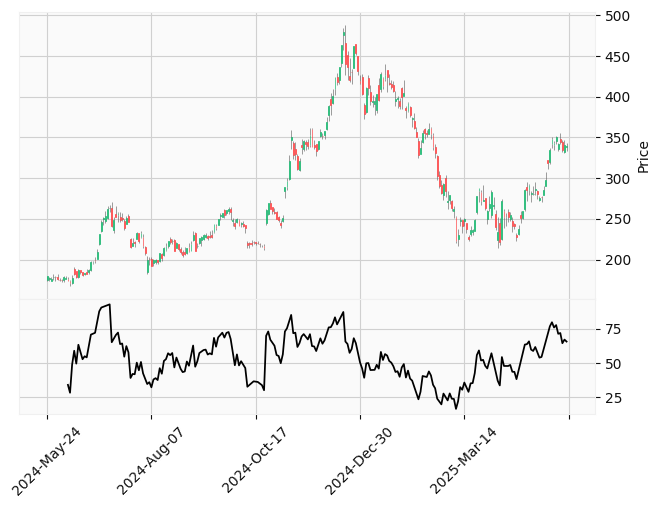

In [1]:
import yfinance as yf
import pandas as pd

stock_name = 'TSLA'
df = yf.download(stock_name,multi_level_index=False,period='12mo')
print(df)

import mplfinance as mpf
import pandas_ta as ta
import talib as ta1
df['rsi2']=ta.rsi(df['Close'],10)
df['rsi']=ta1.RSI(df['Close'],10)
print(df)

a=mpf.make_addplot(df['rsi'],color='black',panel=1)
mpf.plot(df,type='candle',style='yahoo',addplot=[a])

In [ ]:
def rsi(close, length=None, scalar=None, talib=None, drift=None, offset=None, **kwargs):
    """Custom RSI Indicator (no pandas_ta or talib, all logic inline)"""

    # Inline helper: Wilder's RMA
    def rma(series, length):
        return series.ewm(alpha=1/length, adjust=False).mean()

    # Inline helper: validate close series
    def verify_series(series, length):
        if not isinstance(series, pd.Series):
            raise ValueError("Input 'close' must be a pandas Series.")
        if len(series) < length:
            raise ValueError("Input 'close' series is shorter than the required length.")
        return series

    # Inline helper: get drift
    def get_drift(drift):
        return int(drift) if drift and drift > 0 else 1

    # Inline helper: get offset
    def get_offset(offset):
        return int(offset) if offset else 0

    # Validate inputs
    length = int(length) if length and length > 0 else 14
    scalar = float(scalar) if scalar else 100.0
    close = verify_series(close, length)
    drift = get_drift(drift)
    offset = get_offset(offset)

    # Calculate RSI
    delta = close.diff(drift)
    positive = delta.copy()
    negative = delta.copy()

    positive[positive < 0] = 0
    negative[negative > 0] = 0

    avg_gain = rma(positive, length)
    avg_loss = rma(negative.abs(), length)

    rs = avg_gain / avg_loss
    rsi = scalar - (scalar / (1 + rs))

    # Offset
    if offset != 0:
        rsi = rsi.shift(offset)

    # Fill handling
    if "fillna" in kwargs:
        rsi.fillna(kwargs["fillna"], inplace=True)
    if "fill_method" in kwargs:
        rsi.fillna(method=kwargs["fill_method"], inplace=True)

    # Set name and category
    rsi.name = f"RSI_{length}"
    rsi.category = "momentum"

    return rsi
df['rsi3']=rsi(df['Close'],10)
df

,Close,High,Low,Open,Volume,rsi2,rsi,rsi3
Date,,,,,,,,
2024-05-24,179.240005,180.080002,173.729996,174.839996,65479700,NaN,NaN,NaN
2024-05-28,176.750000,178.250000,173.160004,176.399994,59736600,NaN,NaN,0.000000
2024-05-29,176.190002,178.149994,173.929993,174.190002,54782600,NaN,NaN,0.000000
2024-05-30,178.789993,182.669998,175.380005,178.580002,77784800,NaN,NaN,11.171689
2024-05-31,178.080002,180.320007,173.820007,178.500000,67314600,NaN,NaN,10.805421
...,...,...,...,...,...,...,...,...
2025-05-19,342.089996,343.000000,333.369995,336.299988,88869900,71.287025,71.287025,71.287025
2025-05-20,343.820007,354.989990,341.630005,347.869995,131715500,71.849110,71.849110,71.849110
2025-05-21,334.619995,347.350006,332.200012,344.429993,102354800,64.399965,64.399965,64.399965


adx